  Q2

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
i1 = cv2.imread("Q2\\input1.jpg")
i2 = cv2.imread("Q2\\input2.jpg")
i3 = cv2.imread("Q2\\input3.jpg")
i4 = cv2.imread("Q2\\input4.jpg")
i5 = cv2.imread("Q2\\input5.jpg")
i6 = cv2.imread("Q2\\input6.jpg")

imgs = [i1,i2,i3,i4,i5,i6]

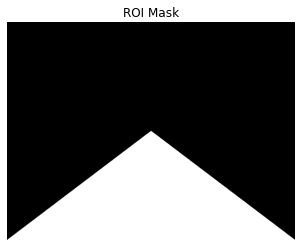

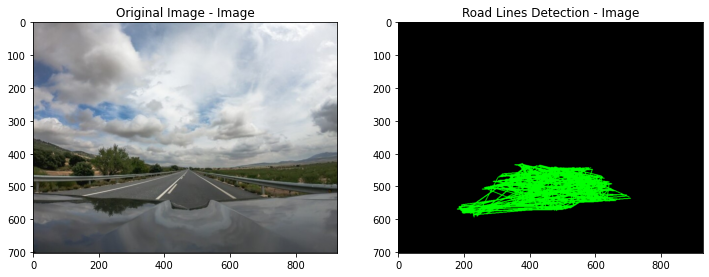

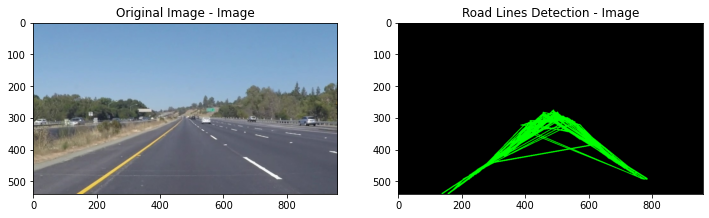

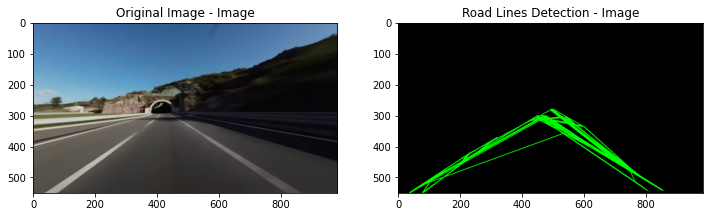

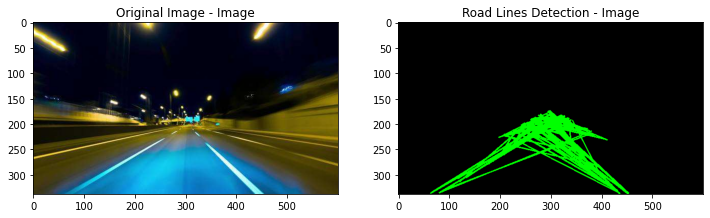

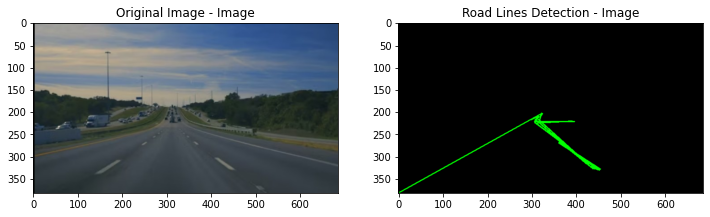

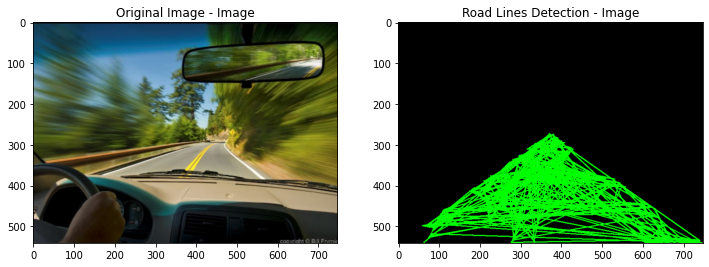

In [20]:

def detect_road_lines(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)

    # roi
    height, width = image.shape[:2]
    roi_vertices = np.array([[(0, height), (width // 2, height // 2), (width, height)]], dtype=np.int32)
    # 0,h = bottom left corner
    #w/2,h/2 = middle
    #w,h = bottom right corner
    mask = np.zeros_like(edges)
    cv2.fillPoly(mask, roi_vertices, 255) #fill the triangle with white
    masked_edges = cv2.bitwise_and(edges, mask) # keeping only the edges within the ROI.
    # hough transform to find the lines
    # rho=1: The distance resolution 
    # theta=np.pi/180: The angle resolution
    # threshold=20: The minimum number of intersections in the accumulator to detect a line.
    # minLineLength=20: The minimum line length to be accepted.
    # maxLineGap=300: The maximum allowed gap between points on the same line to link them.

    lines = cv2.HoughLinesP(masked_edges, rho=3, theta=np.pi/180, threshold=10,
                            minLineLength=5, maxLineGap=400)

    # draw the detected lines on the original image
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Combine the original image and the line image
    result = cv2.addWeighted(image, 0, line_image, 2, 0)
    return result, mask

mask_displayed = False
for image in imgs:
    processed_image, m = detect_road_lines(image)
    if(not mask_displayed):
           # Display the mask
            plt.imshow(m, cmap='gray')
            plt.title('ROI Mask')
            plt.axis('off')
            plt.show()
            mask_displayed=True
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title(f'Original Image - Image')
    ax[1].imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    ax[1].set_title(f'Road Lines Detection - Image')
    plt.show()